<a href="https://colab.research.google.com/github/IT21174230/NLP/blob/main/Copy_of_Sentiment_Analysis_(LogReg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset='/content/drive/MyDrive/AmazonReview.csv'
data=pd.read_csv(dataset)

data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


Review       1
Sentiment    0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.dropna(subset=['Review'])

1    5000
2    5000
3    5000
4    5000
5    4999
Name: Sentiment, dtype: int64


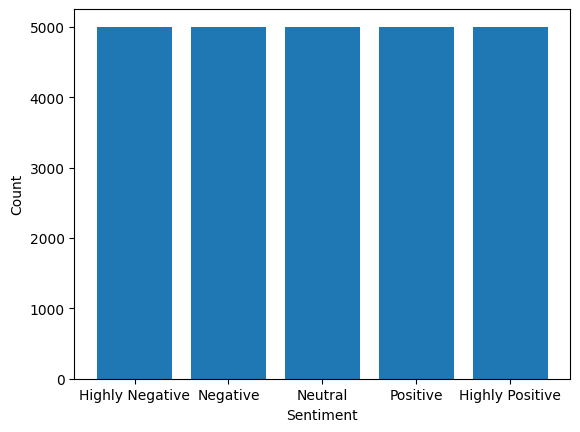

In [ ]:
import matplotlib.pyplot as plt

y_value_counts=data['Sentiment'].value_counts()
print(y_value_counts)

y_labels=['Highly Negative', 'Negative', 'Neutral', 'Positive', 'Highly Positive']

plt.bar(y_labels, y_value_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head()

,Review,Sentiment
9074,"Got mine today, no instructions excepting what...",2
22561,"I gave this a five star rating, because it loo...",5
10320,"this case looked great, and it protects my ipo...",3
19169,Doesn't fit in an iphone 6 lifeproof case port...,4
19764,I bought this as I was going to a music festiv...,4


In [ ]:
reviews=[]

import re

for i in data['Review']:
  j=re.sub(r'[^a-zA-Z0-9\s]', '', i)
  reviews.append(j.lower())

print(reviews[10:15])



['these ear buds are smaller than my originals and are gellike instead of the marshmellowy consistency im used to and dont block as much noise as my originals however the sellers service and delivery time is excellent', 'ended up not needing them', 'i got this case for my garmin 60csx this case felt great it had 3 compartments for stuff and built really well i put my car plug in one compartment  the usb cable in another but the 60csx does not exactly fit well in the middle one disappointed kinda but the overall quality of the product kept me happy battery compartment in the center compartment but due to the gpss length is not condusive to using', 'asinb000vxqh6w 2gb waterproof mp3 player w screenboasinb001f8tg42 h2o audio amphibx waterproof armband for medium mp3 players and phones  i bought freestyle waterproof mp3 player in nov 08 to use swimming laps i told everyone at the ymca how great it was then in dec it died i bought a new one thinking that maybe it was my fault for using it i

In [ ]:
print(reviews[5])

this is a cheap plastic box period  i was disappointed in the fact that there isnt a headphone jack charging port volume keys i wish i can find a way to send this back to get my money back any way the front cover is made of sticky rubber that kind which attract dusthair n sand dont waste you money


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stop_list=stopwords.words('english')

tokens_list=[]

for i in range(len(reviews)):
  tokens=word_tokenize(reviews[i])
  j=[]
  for token in tokens:
    if token not in stop_list:
      j.append(token)
  tokens_list.append(j)
  reviews[i]=' '.join(j)

print(reviews[5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


works good make sure mounted properly car music fades


In [ ]:
print(tokens_list[:5])

[['good', 'software', 'bad'], ['docking', 'station', 'doesnt', 'produce', 'audio', 'rca', 'jack', 'itouch', '2g', 'spend', 'extra', 'bucks', 'rca', 'audiovideo', 'ipod', 'touch', 'connector', 'cable', 'ad', 'implies', 'rca', 'works', 'ipods', 'buyer', 'beware'], ['case', 'keyboard', 'combination', 'works', 'great', 'bn', 'nook', 'hd', 'love', 'fits', 'perfectly', 'keyboard', 'functional', 'nook', 'like', 'minilaptop', 'price', 'makes', 'incredible', 'value', 'since', 'referred', 'ionic', 'casekeyboard', 'product', 'line', 'three', 'people'], ['run', 'special', 'events', 'sport', 'events', 'several', 'time', 'year', 'similar', 'design', 'megaphones', 'used', 'seems', 'like', 'good', 'quality', 'plastic', 'feels', 'sturdy', 'uses', 'half', 'batteries', 'similarly', 'powered', 'models', 'means', 'less', 'weight', 'less', 'cost', 'operate', 'works', 'well', 'easily', 'lasted', '3', 'half', 'days', 'constant', 'use', 'seems', 'like', 'battery', 'compartment', 'hinge', 'clasp', 'might', 'pro

In [ ]:
!pip install Gensim

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data=[TaggedDocument(words=token_item, tags=[str(i)]) for i, token_item in enumerate(tokens_list)]


In [ ]:
epochs=20
vector_size=500
min_count=1

model=Doc2Vec(
    vector_size=vector_size,
    min_count=min_count,
    epochs=epochs
)

model.build_vocab(tagged_data)

model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model.save('reviews.model')

In [ ]:
X=[]
for i in range(len(reviews)):
  X.append(model.dv[str(i)])

print(X[5])

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels=set(data['Sentiment'])
print(labels)
encoder=LabelEncoder()
y=encoder.fit_transform(data['Sentiment'])
unique=set(y)
print(unique)

{1, 2, 3, 4, 5}
{0, 1, 2, 3, 4}


In [ ]:
import numpy as np

y=np.array(y)
X=np.array(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18749, 500) (18749,) (6250, 500) (6250,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logregmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs')

param_grid={
    'C':[0.25, 0.5,1, 2, 3, 4, 5],
    'penalty':['l2'],
    'max_iter':[1000]
}

from sklearn.model_selection import GridSearchCV

gridsearch=GridSearchCV(estimator=logregmodel, param_grid=param_grid, scoring='accuracy', cv=4)
gridsearch.fit(X_train, y_train)


best_params=gridsearch.best_params_
best_model=gridsearch.best_estimator_
y_train_pred=best_model.predict(X_train)

In [ ]:
print(best_params)

{'C': 4, 'max_iter': 1000, 'penalty': 'l2'}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.41


              precision    recall  f1-score   support

           0       0.49      0.57      0.53      1269
           1       0.33      0.25      0.28      1295
           2       0.33      0.33      0.33      1215
           3       0.37      0.30      0.33      1238
           4       0.47      0.62      0.54      1233

    accuracy                           0.41      6250
   macro avg       0.40      0.41      0.40      6250
weighted avg       0.40      0.41      0.40      6250

